In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [61]:
#a - нижняя диагональ
#b - средняя
#с - верхняя
def three_diag(a, b, c, f):
    n = len(f)
    w = np.zeros(n-1,float)
    g = np.zeros(n, float)
    x = np.zeros(n,float)

    w[0] = c[0]/b[0]
    g[0] = f[0]/b[0]

    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (f[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    x[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        x[i-1] = g[i-1] - w[i-1]*x[i]
    return x

def init_matrix(n):
    a = [1] * (n - 1)
    a[0] = 1
    a[n - 2] = 0
    
    b = [-2] * (n)
    b[0] = 1
    b[n - 1] = 1
    
    c = [1] * (n - 1)
    c[0] = 0
    c[n - 2] = 1
    
    h = 1.0 / (n - 1)
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    f = np.sin(np.arange(n) * 2 * math.pi * h) * (4 * (np.sin(math.pi * h))**2)    
    return (a, b, c, f)


Графики решения дифференциального уравнения $y'' = sin(x)$ c граничными условиями $y(0) = 0$, $y(2\pi) = 0$ и соответствующего разностного уравнения (с нормировочной константой для совпадения решений в узлах сетки): 
 $y(x) = -\sin(x)$,
 $y_k = -sin(\frac{2\pi k}n)$ 

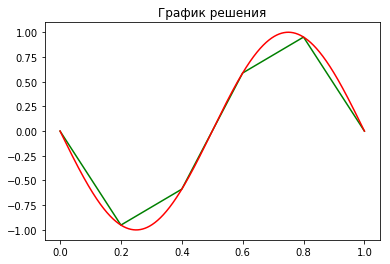

In [62]:
N = 5
h = 1 / N
x = np.arange(0, 1 + h / 100, h)

a, b, c, f = init_matrix(N + 1)
res = three_diag(a,b,c,f)
plt.figure()
plt.plot(x, res, 'g')
z = np.arange(0, 1 + 1e-6, 1e-6)
plt.plot(z, -np.sin(2 * math.pi * z), 'r')
plt.title(u"График решения")
plt.show()


In [59]:
norm2 = []
normInf = []
res = []
for N in range(5, 1000, 5):
    a, b, c, f = init_matrix(N)
    res = three_diag(a,b,c,f)
    ans = -np.sin(np.arange(N) * 2 * math.pi / N)
    norm2.append(np.linalg.norm(res - ans))
    normInf.append(np.linalg.norm(res - ans, np.inf))

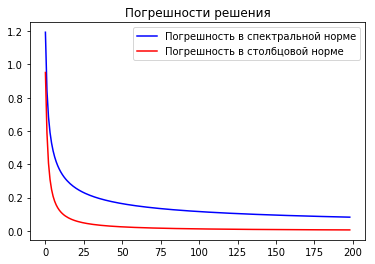

In [6]:
plt.figure()
pl1, = plt.plot(norm2, 'b')
pl2, = plt.plot(normInf, 'r')
plt.legend([pl1, pl2], ['Погрешность в спектральной норме', 'Погрешность в столбцовой норме'], loc = 1)
plt.title(u"Погрешности решения")
plt.show()

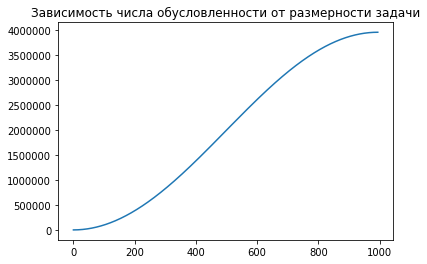

In [7]:
res = []
for N in range(5, 1000, 5):  
    lambdas = 4 * N ** 2 * np.sin(math.pi * (2 * np.arange(1, N + 1) - 1) / 4 / N) ** 2
    res.append(np.max(lambdas) / np.min(lambdas))
    
plt.figure()
plt.plot(lambdas)
plt.title(u"Зависимость числа обусловленности от размерности задачи")
plt.show()
